## Lec 3. 卷积神经网络 CNN (Convolution Neural Network)

- 卷积神经网络 (互相关运算)

In [1]:
import torch
import torch.nn as nn

In [5]:
def corr2d(x, kernel):
    """ 互相关运算函数 """
    h_x, w_x = x.shape
    h_k, w_k = kernel.shape
    y = torch.zeros((h_x - h_k + 1, w_x - w_k + 1))
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            y[i, j] = (x[i: i + h_k, j: j + w_k] * kernel).sum()
    return y

In [7]:
x = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
kernel = torch.tensor([[0,1], [2,3]])
kernel

tensor([[0, 1],
        [2, 3]])

In [9]:
corr2d(x, kernel)

tensor([[19., 25.],
        [37., 43.]])

In [11]:
x = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
kernel = torch.tensor([[0,1], [1,0]])
kernel

tensor([[0, 1],
        [1, 0]])

In [13]:
corr2d(x, kernel)

tensor([[ 4.,  6.],
        [10., 12.]])

In [9]:
class Conv2d(nn.Module):
    """ 二维卷积神经网络层 """
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))
        
    def forward(self, x):
        """ 前向传播方法 """
        return corr2d(x, self.weight) + self.bias

In [11]:
model = Conv2d(kernel_size=(2, 2))
model

Conv2d()

In [94]:
output = model(x)
output

tensor([[ 4.2098,  6.2108],
        [10.2129, 12.2140]], grad_fn=<AddBackward0>)

In [104]:
model = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=0) #stride为步长，padding为上下左右是否加一圈0
model

Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))

In [113]:
# x: [B, C, H, W]
# img: [C, H, W] -> unsqueeze(0)
output = model(img.unsqueeze(0))
output.shape  # output: [B, C, H, W]

torch.Size([1, 16, 26, 26])

### 3.1 Fasion-MNIST 图像识别任务 (线性神经网络)

In [3]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download = True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download = True)

len(mnist_train), len(mnist_test)

(60000, 10000)

In [5]:
import torch.nn as nn

class LinearClassifier(nn.Module):
    """ 基于线性神经网络的分类模型 """
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(nn.Linear(784, 256),  #28*28=784
                                nn.ReLU(), 
                                nn.Linear(256, 10))
        
    def forward(self, x):
        """ 前向传播方法 """
        return self.fc(x)

In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(mnist_train, batch_size=256, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=256, shuffle=False)

len(train_dataloader)

235

In [9]:
img,lable = mnist_test[0]
img.shape

torch.Size([1, 28, 28])

In [11]:
def train_model(model, train_dataloader, loss_func, optimizer):
    """ 模型训练函数 """
    model.train()
    total_loss = 0.
    for x, y in train_dataloader:
        # x: [batch_size, 1, 28, 28]
        # y: [batch_size]
        y_hat = model(x.view(x.shape[0], -1)) #拉平
        loss = loss_func(y_hat, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()       
        
        total_loss += loss.item()
    return total_loss / len(train_dataloader)


def test_model(model, test_dataloader, loss_func):
    """ 模型测试函数 """
    model.eval()
    total_loss = 0.
    for x, y in test_dataloader:
        # x: [batch_size, 1, 28, 28]
        # y: [batch_size]
        y_hat = model(x.view(x.shape[0], -1))
        loss = loss_func(y_hat, y)
        
        total_loss += loss.item()
    return total_loss / len(test_dataloader)

In [13]:
model = LinearClassifier()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [15]:
n_epoch = 50

train_loss_list = []
test_loss_list = []
for i in range(n_epoch):
    train_loss = train_model(model, train_dataloader, loss_func, optimizer)
    test_loss = test_model(model, train_dataloader, loss_func)
    
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    print(train_loss)

0.6183295192870688
0.42693900719602057
0.38800790170405774
0.35813935570260313
0.3366543187105909
0.323394046692138
0.31016531776874623
0.296264582301708
0.2832437628127159
0.2762103314095355
0.2654928355140889
0.25796518858442913
0.25147654014699
0.24300739834917354
0.23829601102686943
0.23195499790475724
0.22652306791315688
0.21883412865882224
0.2148375595503665
0.20956691975923294
0.20384826190928196
0.19929106596936572
0.19498753592054896
0.19032067520187257
0.18506035066031395
0.1805073176609709
0.17730824966379938
0.1730315715074539
0.1698423424299727
0.16404250539997792
0.16105227603557262
0.15745146813544822
0.15355690188230353
0.15223694342247984
0.14550082116050922
0.1434841734297732
0.14010177035915092
0.13730516687352606
0.13310704370762438
0.1317307066727192
0.12988767877538154
0.1242291934788227
0.1253690410167613
0.12187544895296401
0.11894614836002917
0.1145716890692711
0.11327562018277797
0.11275556531358273
0.10608242658224512
0.10346206279194102


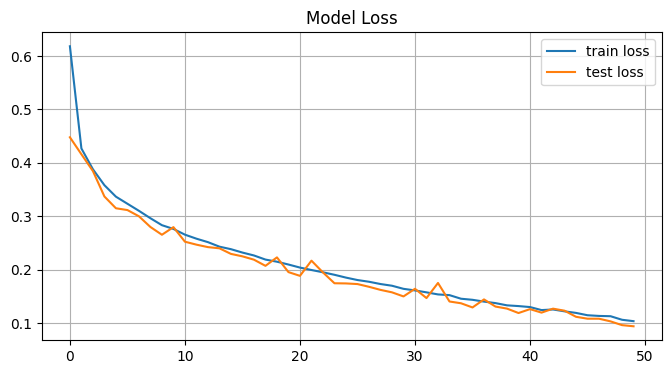

In [19]:
import matplotlib.pyplot as plt
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

plt.figure(figsize=(8, 4))
plt.plot(train_loss_list, label="train loss")
plt.plot(test_loss_list, label="test loss")
plt.title("Model Loss")
plt.grid()
plt.legend()
plt.show()

### 3.2 Fasion-MNIST 图像识别任务 (线性神经网络)

In [21]:
class LeNet(nn.Module):
    """ 二维卷积神经网络分类模型 """
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5, padding=2), 
                                  nn.Sigmoid(), 
                                  nn.AvgPool2d(kernel_size=2, stride=2), 
                                 
                                  nn.Conv2d(6, 16, kernel_size=5), 
                                  nn.Sigmoid(), 
                                  nn.AvgPool2d(kernel_size=2, stride=2))
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(nn.Linear(16*5*5, 120), 
                                nn.Sigmoid(), 
                                
                                nn.Linear(120, 84), 
                                nn.Sigmoid(), 
                                
                                nn.Linear(84, 10))
        
    def forward(self, x):
        """ 前向传播方法 """
        feat_map = self.conv(x)
        output = self.flatten(feat_map)
        return self.fc(output)

In [33]:
model = LeNet()
model

LeNet(
  (conv): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [43]:
img.shape
a = img.squeeze(dim=0)
img.shape,a.shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]))

In [59]:
img.shape
b = img.unsqueeze(dim=0)
img.shape,b.shape

(torch.Size([1, 28, 28]), torch.Size([1, 1, 28, 28]))

In [53]:
output = model(img.unsqueeze(0))

torch.Size([1, 10])

In [37]:
model = LeNet()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [45]:
def train_model(model, train_dataloader, loss_func, optimizer):
    """ 模型训练函数 """
    model.train()
    total_loss = 0.
    for x, y in train_dataloader:
        # x: [batch_size, 1, 28, 28]
        # y: [batch_size]
        y_hat = model(x.squeeze(dim=0))
        loss = loss_func(y_hat, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()       
        
        total_loss += loss.item()
    return total_loss / len(train_dataloader)


def test_model(model, test_dataloader, loss_func):
    """ 模型测试函数 """
    model.eval()
    total_loss = 0.
    for x, y in test_dataloader:
        # x: [batch_size, 1, 28, 28]
        # y: [batch_size]
        y_hat = model(x.squeeze(dim=0))
        loss = loss_func(y_hat, y)
        
        total_loss += loss.item()
    return total_loss / len(test_dataloader)

In [51]:
n_epoch = 30

train_loss_list = []
test_loss_list = []
for i in range(n_epoch):
    train_loss = train_model(model, train_dataloader, loss_func, optimizer)
    test_loss = test_model(model, train_dataloader, loss_func)
    
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    print(train_loss)

0.5843636691570282
0.5544210286850625
0.5280683399514949
0.5054143669757437
0.48380254418291946
0.46437602664561983
0.44947772901108923
0.43722371382916225
0.428964434532409
0.4186870044850289
0.4099504770116603
0.40175004626842253
0.39297485567153767
0.3871713735955827
0.38082678026341377
0.3764008491597277
0.36985708823863495
0.36482017997731553
0.36008630490049404
0.3562120467424393
0.352732142108552
0.3465861090954314
0.3427244729818182
0.3389113153548951
0.33374699480990144
0.3306206579538102
0.32633486872023726
0.32347381552483173
0.3211397331445775
0.31604999075544643


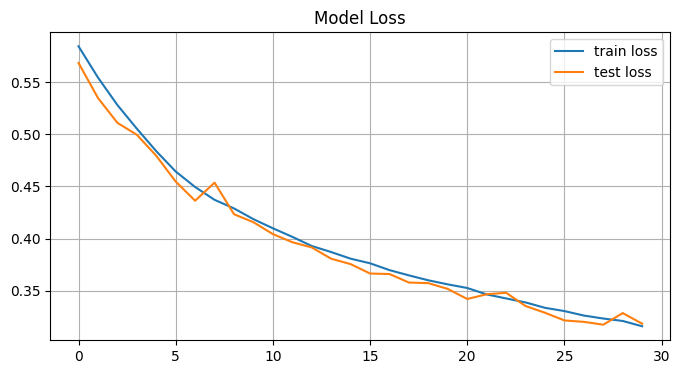

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(train_loss_list, label="train loss")
plt.plot(test_loss_list, label="test loss")
plt.title("Model Loss")
plt.grid()
plt.legend()
plt.show()

In [65]:
def train_model(model, train_dataloader, loss_func, optimizer):
    """ 模型训练函数 """
    model.train()
    total_loss = 0.
    for x, y in train_dataloader:
        # x: [batch_size, 1, 28, 28]
        # y: [batch_size]
        y_hat = model(x)
        loss = loss_func(y_hat, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()       
        
        total_loss += loss.item()
    return total_loss / len(train_dataloader)


def test_model(model, test_dataloader, loss_func):
    """ 模型测试函数 """
    model.eval()
    total_loss = 0.
    for x, y in test_dataloader:
        # x: [batch_size, 1, 28, 28]
        # y: [batch_size]
        y_hat = model(x)
        loss = loss_func(y_hat, y)
        
        total_loss += loss.item()
    return total_loss / len(test_dataloader)

In [67]:
n_epoch = 30

train_loss_list = []
test_loss_list = []
for i in range(n_epoch):
    train_loss = train_model(model, train_dataloader, loss_func, optimizer)
    test_loss = test_model(model, train_dataloader, loss_func)
    
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    print(train_loss)

0.31608112708051156
0.31308637153595054
0.3105176355610503
0.3068879795835373
0.30675320092667924
0.3047604450520049
0.30139945637672505
0.29987390104760514
0.2968379145607035
0.29515342490470153
0.29458404056569365
0.2905996798834902
0.2893656690704062
0.28974590003490447
0.284214796981913
0.28208434721256825
0.2823683568771849
0.27978460788726806
0.2780524775702903
0.27664736953187496
0.27522166073322296
0.2752013681416816
0.27080024189137397
0.2698205128629157
0.2690866113343137
0.26657805354037184
0.2650482230046962
0.26310472405971363
0.26262640686745337
0.26252146306190083


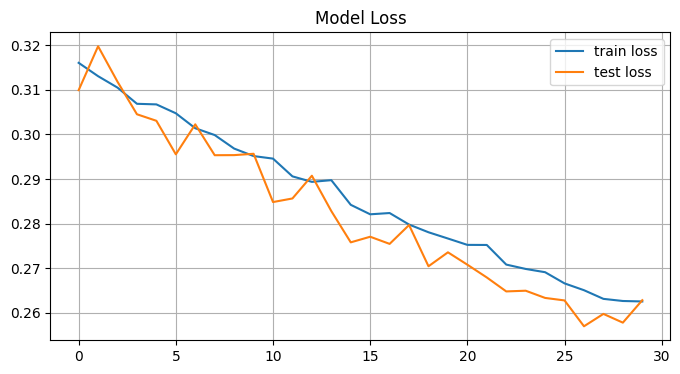

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(train_loss_list, label="train loss")
plt.plot(test_loss_list, label="test loss")
plt.title("Model Loss")
plt.grid()
plt.legend()
plt.show()

In [ ]:
1. Load Dataset
2. Model
(model, loss_func, optimizer, device)
3. Train Model
4. Test Model
5. Plot Loss (epoch>=30)